In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving tips (data for regression problem) (2).csv to tips (data for regression problem) (2).csv


In [ ]:
file_path = "/content/tips (data for regression problem) (2).csv"
df = pd.read_csv(file_path)

In [ ]:
df.head()


print("Missing values in dataset:")
print(df.isnull().sum())

Missing values in dataset:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [ ]:
print("\nDataset statistics:")
print(df.describe())


Dataset statistics:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


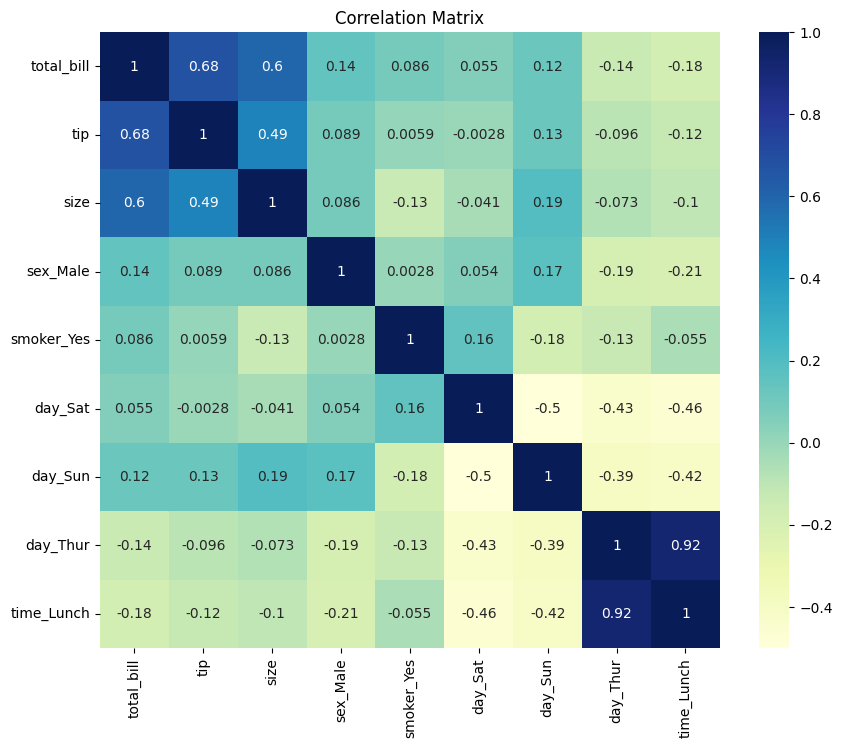

In [ ]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)


plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
data = pd.get_dummies(data, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)


In [ ]:
X = df.drop(columns=['tip'])
y = df['tip']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2


models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5)
}


results = []
for model_name, model in models.items():
    mae, rmse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results.append((model_name, mae, rmse, r2))
    print(f"{model_name}: MAE={mae:.2f}, RMSE={rmse:.2f}, R2={r2:.2f}")

results_df = pd.DataFrame(results, columns=['Model', 'MAE', 'RMSE', 'R2'])
results_df.sort_values(by='R2', ascending=False, inplace=True)
print("\nModel Performance Comparison:")
print(results_df)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
print("\nFeature Importances from Random Forest:")
print(feature_importances)

Linear Regression: MAE=0.67, RMSE=0.84, R2=0.44
Ridge Regression: MAE=0.67, RMSE=0.84, R2=0.44
Lasso Regression: MAE=0.64, RMSE=0.77, R2=0.53
Decision Tree: MAE=0.83, RMSE=1.12, R2=-0.00
Random Forest: MAE=0.76, RMSE=0.96, R2=0.26
Support Vector Regression: MAE=0.57, RMSE=0.73, R2=0.57
K-Nearest Neighbors: MAE=0.72, RMSE=0.94, R2=0.30

Model Performance Comparison:
                       Model       MAE      RMSE        R2
5  Support Vector Regression  0.567986  0.729641  0.574089
2           Lasso Regression  0.637484  0.768670  0.527307
1           Ridge Regression  0.666538  0.837107  0.439389
0          Linear Regression  0.667133  0.838664  0.437302
6        K-Nearest Neighbors  0.718857  0.936148  0.298886
4              Random Forest  0.755716  0.958995  0.264246
3              Decision Tree  0.829592  1.120354 -0.004178

Feature Importances from Random Forest:
      Feature  Importance
0  total_bill    0.767043
3  smoker_Yes    0.069417
1        size    0.058045
4     day_Sat  

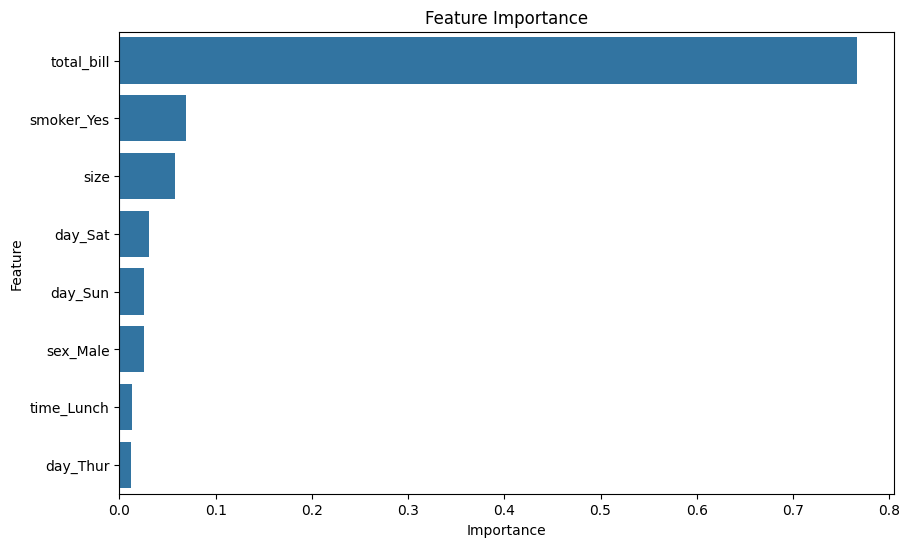


Management Insights:
- Higher bills correlate with higher tips, suggesting upselling could boost tip revenue.
- Larger groups may tip more, so optimizing table arrangements for groups could be beneficial.


In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance")
plt.show()


print("\nManagement Insights:")
if 'total_bill' in feature_importances['Feature'].values:
    print("- Higher bills correlate with higher tips, suggesting upselling could boost tip revenue.")
if 'size' in feature_importances['Feature'].values:
    print("- Larger groups may tip more, so optimizing table arrangements for groups could be beneficial.")
if 'time_Dinner' in feature_importances['Feature'].values:
    print("- Dinner times show different tipping behavior; consider personalized service during these times.")

In [ ]:
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.api as sm

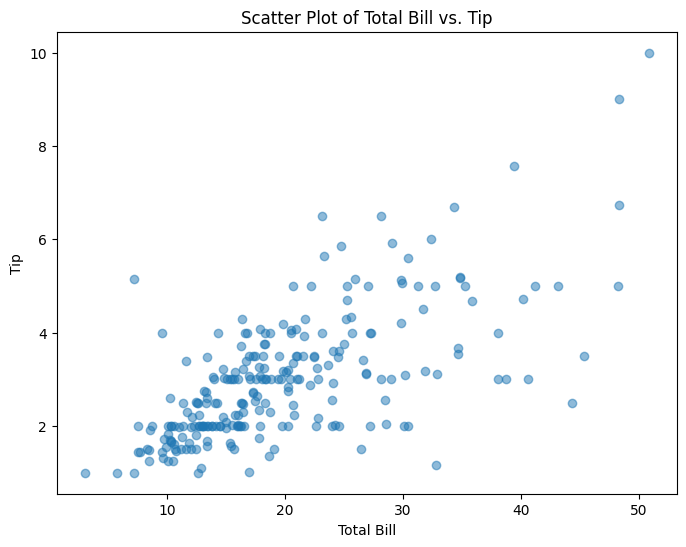

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['total_bill'], df['tip'], alpha=0.5)
plt.title("Scatter Plot of Total Bill vs. Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

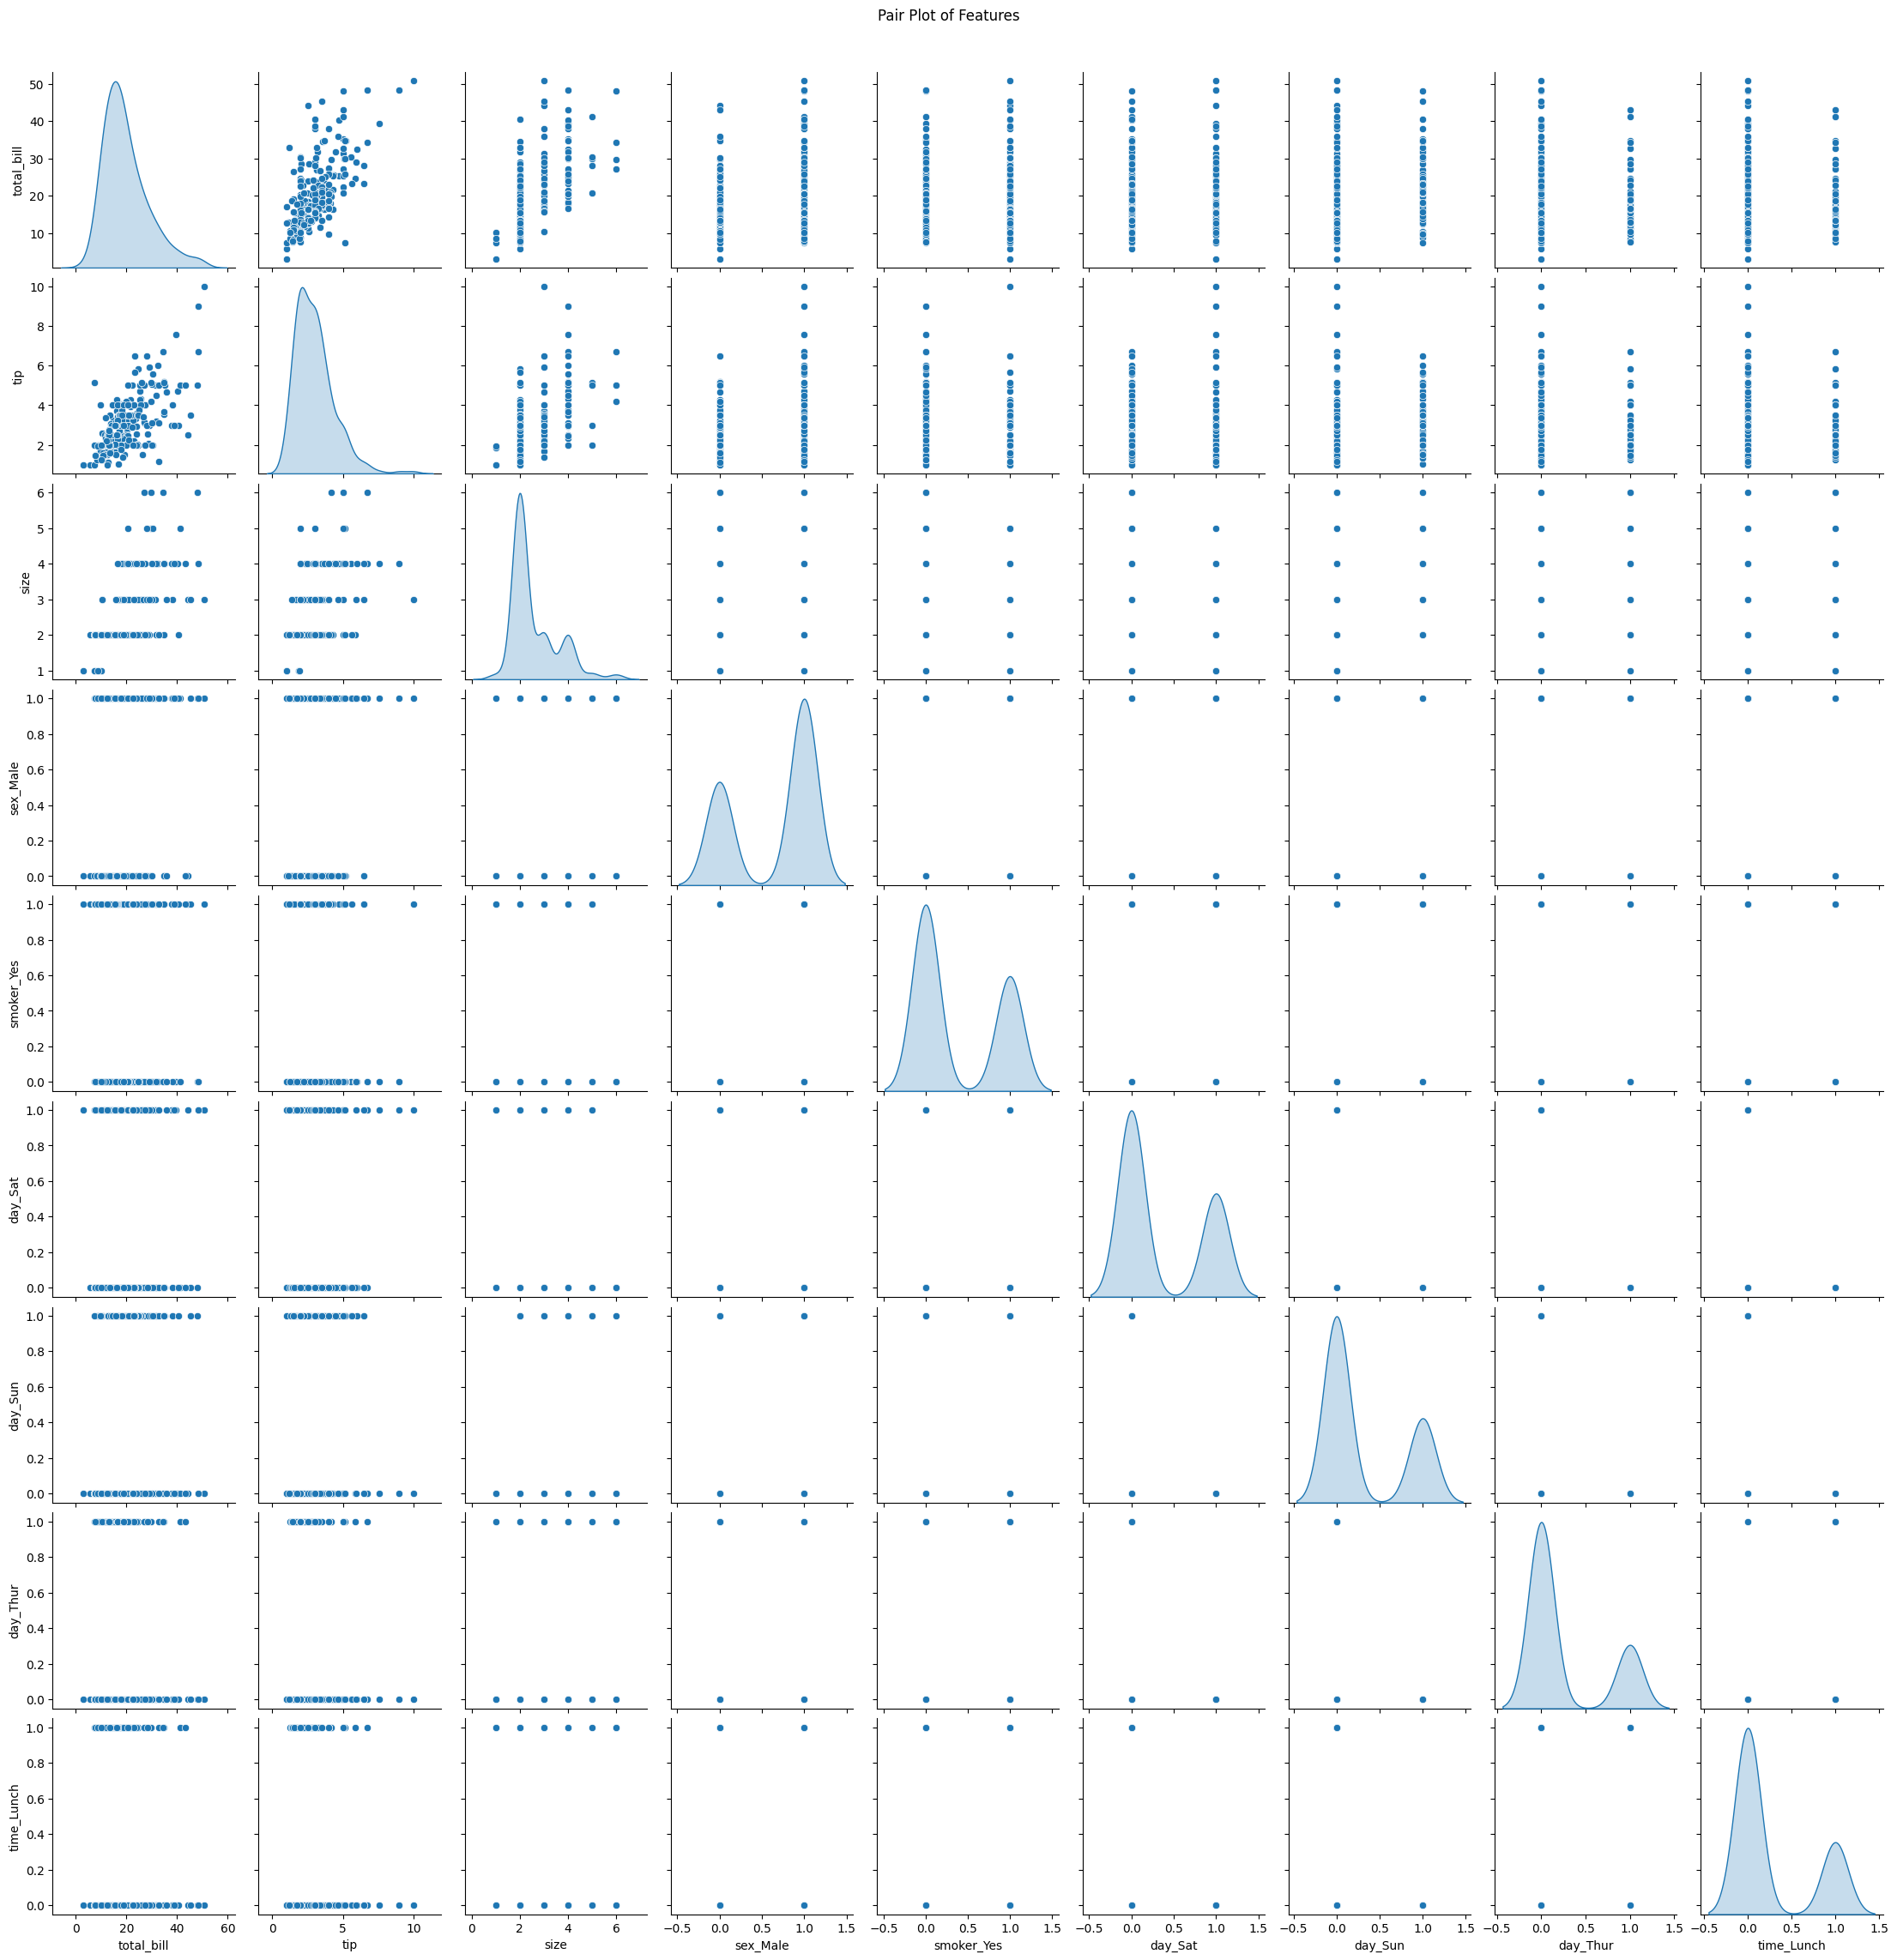

In [ ]:

sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pair Plot of Features", y=1.02)
plt.show()

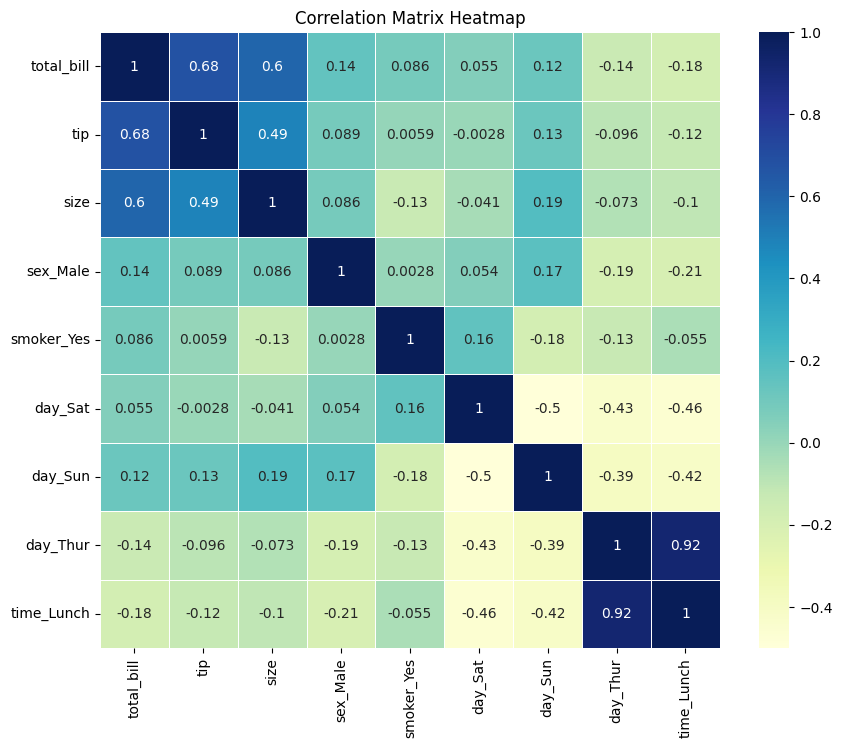

In [ ]:

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
X = pd.get_dummies(df.drop(columns=['tip']), drop_first=True)
y = df['tip']

In [ ]:

X_with_const = X_with_const.astype({col: 'int' for col in X_with_const.select_dtypes(include='bool').columns})

model = sm.OLS(y, X_with_const).fit()
try:
    rainbow_stat, rainbow_p_val = linear_rainbow(model)
    print(f"Rainbow Test p-value: {rainbow_p_val:.4f}")
    if rainbow_p_val > 0.05:
        print("Rainbow Test indicates the data may follow a linear trend (fail to reject null hypothesis).")
    else:
        print("Rainbow Test indicates the data may not follow a linear trend (reject null hypothesis).")
except ValueError as e:
    print(f"Error in running Rainbow Test: {e}")


Rainbow Test p-value: 0.1659
Rainbow Test indicates the data may follow a linear trend (fail to reject null hypothesis).


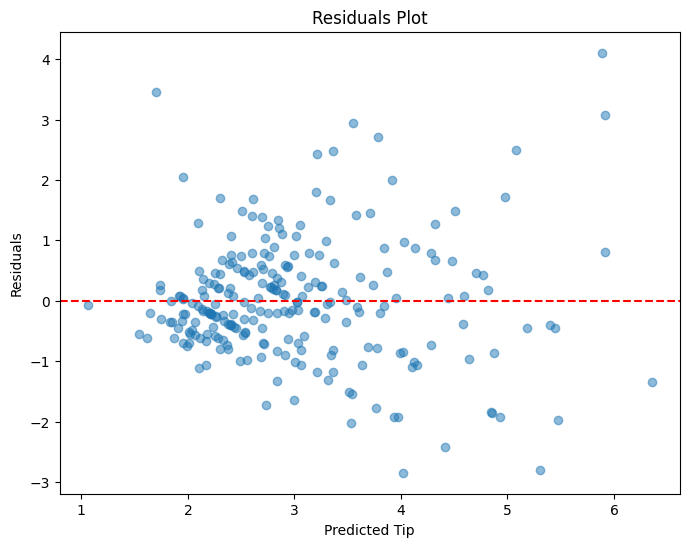

In [ ]:
predicted_values = model.predict(X_with_const)
residuals = y - predicted_values

plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals Plot")
plt.xlabel("Predicted Tip")
plt.ylabel("Residuals")
plt.show()

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


y_pred = linear_reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"\nLinear Regression Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")


for model_name, model in models.items():
    mae, rmse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    print(f"{model_name}: MAE={mae:.2f}, RMSE={rmse:.2f}, R2={r2:.2f}")


Linear Regression Model Performance:
MAE: 0.67
RMSE: 0.84
R^2: 0.44
Linear Regression: MAE=0.67, RMSE=0.84, R2=0.44
Ridge Regression: MAE=0.67, RMSE=0.84, R2=0.44
Lasso Regression: MAE=0.64, RMSE=0.77, R2=0.53
Decision Tree: MAE=0.83, RMSE=1.12, R2=-0.00
Random Forest: MAE=0.76, RMSE=0.96, R2=0.26
Support Vector Regression: MAE=0.57, RMSE=0.73, R2=0.57
K-Nearest Neighbors: MAE=0.72, RMSE=0.94, R2=0.30
